# __CAFE SALES ANALYSIS__
***

__Source:__ _https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training?select=dirty_cafe_sales.csv_
<br>

__Overview__

The Dirty Cafe Sales dataset contains 10,000 rows of synthetic data representing sales transactions in a cafe. This dataset is intentionally "dirty," with missing values, inconsistent data, and errors introduced to provide a realistic scenario for data cleaning and exploratory data analysis (EDA). It can be used to practice cleaning techniques, data wrangling, and feature engineering.
<br>

__File Information__

File Name:          _dirty_cafe_sales.csv_ <br>
Number of Rows:     _10,000_ <br>
Number of Columns:  _8_ <br>

***

In [2]:
## Importing libraries
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

## Optional
# import os
# import numpy as np


***

In [3]:
## Importing .csv 
cafe = pd.read_csv("dirty_cafe_sales.csv")
df_cafe = pd.DataFrame(cafe)
df_cafe.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [4]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


***

### 01 _ Data overview and cleaning steps.

#### 01# _ Colums labels overview.

In [5]:
# df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
# df_cafe.info()

In [6]:
## Columns labels.
col_list = []
for col in df_cafe.columns[:]:
    col_list.append(col)

for el in col_list:
    print(el)

Transaction ID
Item
Quantity
Price Per Unit
Total Spent
Payment Method
Location
Transaction Date


***

#### 01.a _ _"Item"_ & _"Quantity"_ labels value check.

In [7]:
## ITEMS LIST.
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [8]:
## PRICE CHECK PER ITEM.
# item_name = input("Type the item name here:     ")

# item_column = df_cafe[(df_cafe["Item"] == item_name) & (df_cafe["Quantity"] == "1")] 
# item_column

## RESULTS:
##    - PRICES TABLE -   ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

***

In [9]:
## ITEMS LIST
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [10]:
## UNIQUE VALUES FOR "Quantity" 
df_cafe["Quantity"].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [11]:
## UNIQUE VALUES FOR "Total Spent" 
df_cafe["Total Spent"].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

***

#### 01.b _ _"Item"_ / _"Price Per Unit"_ / _"Quantity"_ / _"Total Spent"_ labels cleaning with data type casting.

In [12]:
## DATA CLEANING 

## Setting correct "Item" prices values  //  df.loc[row, column]
df_cafe.loc[df_cafe["Item"] == "Coffee", "Price Per Unit"] = 2.0
df_cafe.loc[df_cafe["Item"] == "Cake", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Cookie", "Price Per Unit"] = 1.0
df_cafe.loc[df_cafe["Item"] == "Salad", "Price Per Unit"] = 5.0
df_cafe.loc[df_cafe["Item"] == "Smoothie", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Sandwich", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Juice", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Tea", "Price Per Unit"] = 1.5


## Setting correct "Quantity" values  //  df.loc[row, column]
## IF Quantity == "ERROR", "UNKNOWN", "nan" THEN Quantity = 0
df_cafe.loc[df_cafe["Quantity"] == "ERROR", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "UNKNOWN", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "nan", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"].isna(), "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == 0.0, "Quantity"] = 1.0


## "Price Per Unit" cleaning.
df_cafe.loc[df_cafe["Price Per Unit"] == "ERROR", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"] == "UNKNOWN", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"].isna(), "Price Per Unit"] = 0.0


## "Total Spent" cleaning.
## Converting to number.
df_cafe.loc[df_cafe["Total Spent"] == "ERROR", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"] == "UNKNOWN", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"].isna(), "Total Spent"] = float(0.0)


## DATA CASTING.
df_cafe["Quantity"] = df_cafe["Quantity"].astype('float')
df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
df_cafe["Total Spent"] = df_cafe["Total Spent"].astype('float')


df_cafe.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,0.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [13]:
## Calculate correct "Total Spent" values.
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Quantity"] * df_cafe["Price Per Unit"]

In [14]:
## Finding residual "Total Spent" == 0.0 values.
print(df_cafe[df_cafe["Total Spent"] == 0.0].to_string())

     Transaction ID     Item  Quantity  Price Per Unit  Total Spent Payment Method  Location Transaction Date
1761    TXN_3611851      NaN       4.0             0.0          0.0    Credit Card       NaN       2023-02-09
2289    TXN_7524977  UNKNOWN       4.0             0.0          0.0          ERROR       NaN       2023-12-09
4152    TXN_9646000    ERROR       2.0             0.0          0.0            NaN  In-store       2023-12-14


***

#### 01.c _ Checking residual _"ERROR"_, _"UNKNOWN"_ and _NaN_ values in _"Item"_ column.

In [15]:
df_cafe[df_cafe["Item"] == "ERROR"]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,ERROR,2.0,1.5,3.0,NaN,In-store,2023-03-21
69,TXN_8471743,ERROR,5.0,3.0,15.0,Digital Wallet,In-store,2023-04-06
88,TXN_9487821,ERROR,1.0,5.0,5.0,Digital Wallet,Takeaway,2023-05-24
118,TXN_4633784,ERROR,5.0,0.0,15.0,NaN,In-store,2023-02-06
211,TXN_6717827,ERROR,3.0,5.0,15.0,Digital Wallet,NaN,2023-11-15
...,...,...,...,...,...,...,...,...
9910,TXN_2338617,ERROR,2.0,3.0,6.0,Digital Wallet,UNKNOWN,2023-01-12
9918,TXN_2292088,ERROR,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9951,TXN_4122925,ERROR,4.0,1.0,4.0,NaN,Takeaway,2023-10-20
9958,TXN_4125474,ERROR,2.0,5.0,10.0,Credit Card,In-store,2023-08-02


In [16]:
df_cafe[df_cafe["Item"] == "UNKNOWN"]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
31,TXN_8927252,UNKNOWN,2.0,1.0,2.0,Credit Card,ERROR,2023-11-06
33,TXN_7710508,UNKNOWN,5.0,1.0,5.0,Cash,NaN,ERROR
36,TXN_6855453,UNKNOWN,4.0,3.0,12.0,NaN,In-store,2023-07-17
52,TXN_8914892,UNKNOWN,5.0,5.0,25.0,Digital Wallet,NaN,2023-03-15
...,...,...,...,...,...,...,...,...
9764,TXN_1688292,UNKNOWN,3.0,0.0,9.0,Credit Card,In-store,NaN
9777,TXN_4385826,UNKNOWN,2.0,1.5,3.0,Credit Card,Takeaway,2023-08-02
9836,TXN_9162296,UNKNOWN,3.0,4.0,12.0,Cash,In-store,2023-05-10
9946,TXN_8807600,UNKNOWN,1.0,4.0,4.0,Cash,Takeaway,2023-09-24


In [17]:
df_cafe[df_cafe["Item"].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,NaN,2023-06-02
61,TXN_8051289,NaN,1.0,3.0,3.0,NaN,In-store,2023-10-09
72,TXN_6044979,NaN,1.0,1.0,1.0,Cash,In-store,2023-12-08
89,TXN_4132730,NaN,5.0,1.0,5.0,NaN,In-store,2023-03-12
...,...,...,...,...,...,...,...,...
9820,TXN_8751702,NaN,5.0,0.0,15.0,Cash,NaN,2023-02-13
9855,TXN_3740505,NaN,2.0,1.5,3.0,NaN,NaN,2023-11-21
9876,TXN_3105633,NaN,1.0,2.0,2.0,NaN,In-store,2023-03-30
9885,TXN_4659954,NaN,3.0,4.0,12.0,Credit Card,In-store,NaN


In [18]:
## Creating a list of "ERROR" values indexes. 
error_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "ERROR"]]
# error_idx_list

In [19]:
## Creating a list of "UNKNOWN" values indexes.
unknown_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "UNKNOWN"]]
# unknown_idx_list

In [20]:
## Creating a list of "NaN" values indexes.
nan_idx_list = [el for el in df_cafe.index[df_cafe["Item"].isna()]]
# nan_idx_list

In [21]:
## DROPPINg Rows with Item == "ERROR"
for el in error_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
139,TXN_4878378,Tea,1.0,1.5,1.5,Credit Card,NaN,2023-02-20
4450,TXN_4153132,Salad,3.0,5.0,15.0,Digital Wallet,NaN,2023-03-21
2264,TXN_8792638,Tea,3.0,1.5,4.5,Credit Card,Takeaway,2023-07-02
4890,TXN_5518591,Cookie,4.0,1.0,4.0,Digital Wallet,NaN,2023-09-21
3725,TXN_2030107,Juice,4.0,3.0,12.0,NaN,Takeaway,2023-01-03
2643,TXN_5573731,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-01-15
8046,TXN_3812053,Coffee,5.0,2.0,10.0,NaN,In-store,2023-04-03
8682,TXN_9789876,Salad,4.0,5.0,20.0,Cash,Takeaway,2023-09-05
4819,TXN_7894558,Coffee,2.0,2.0,4.0,NaN,NaN,2023-01-04
2958,TXN_7451083,Coffee,1.0,2.0,2.0,Digital Wallet,NaN,2023-06-24


In [22]:
## DROPPINg Rows with Item == "UNKNOWN"
for el in unknown_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5427,TXN_3884527,Sandwich,1.0,4.0,4.0,Digital Wallet,In-store,2023-06-06
7755,TXN_2009782,Salad,5.0,5.0,25.0,Credit Card,ERROR,2023-05-11
7157,TXN_2242015,Tea,2.0,1.5,3.0,Cash,ERROR,2023-08-26
553,TXN_3381656,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-10-26
9277,TXN_7771516,Sandwich,3.0,4.0,12.0,UNKNOWN,NaN,2023-05-26
1340,TXN_8543211,Juice,3.0,3.0,9.0,NaN,Takeaway,2023-11-30
1598,TXN_2335088,Salad,4.0,5.0,20.0,Cash,In-store,2023-10-27
1724,TXN_1225638,Cake,4.0,3.0,12.0,Cash,Takeaway,2023-05-28
1504,TXN_7794561,Juice,4.0,3.0,12.0,Credit Card,In-store,2023-05-18
1496,TXN_6738350,Juice,2.0,3.0,6.0,Digital Wallet,NaN,2023-11-02


In [23]:
## DROPPINg Rows with Item == NaN
for el in nan_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8549,TXN_6769554,Coffee,5.0,2.0,10.0,Credit Card,Takeaway,2023-02-06
2983,TXN_1617476,Cake,2.0,3.0,6.0,Digital Wallet,In-store,2023-02-10
2824,TXN_8668840,Cake,5.0,3.0,15.0,Digital Wallet,NaN,2023-10-03
2319,TXN_5737831,Juice,4.0,3.0,12.0,ERROR,Takeaway,2023-05-15
3613,TXN_9489495,Coffee,1.0,2.0,2.0,Credit Card,NaN,2023-05-20
9990,TXN_1538510,Coffee,5.0,2.0,10.0,Digital Wallet,NaN,2023-05-22
6705,TXN_5679935,Coffee,2.0,2.0,4.0,Credit Card,NaN,2023-07-19
122,TXN_5179020,Cake,2.0,3.0,6.0,NaN,Takeaway,2023-06-18
3447,TXN_8999576,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-04-09
2792,TXN_6866209,Smoothie,5.0,4.0,20.0,Digital Wallet,In-store,2023-05-20


In [24]:
## Check for Dataframe info after data type conversion.
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          9031 non-null   float64
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9031 non-null   float64
 5   Payment Method    6701 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(3), object(5)
memory usage: 635.0+ KB


#### 01.d _ _"Quantity"_, _"Total Spent"_, _"Price Per Unit"_ ratio calculation.

In [25]:
## FIELDS CALCULATIONS

## "Quantity"
df_cafe.loc[df_cafe["Quantity"] == 1.0, "Quantity"] = df_cafe["Total Spent"] / df_cafe["Price Per Unit"]

## "Total Spent"
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Price Per Unit"] * df_cafe["Quantity"]

## "Price Per Unit"
df_cafe.loc[df_cafe["Price Per Unit"] == 0.0, "Price Per Unit"] = df_cafe["Total Spent"] / df_cafe["Quantity"]


df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6041,TXN_6027031,Juice,5.0,3.0,15.0,Credit Card,In-store,2023-11-15
1918,TXN_8360073,Cake,4.0,3.0,12.0,Digital Wallet,In-store,2023-06-15
7999,TXN_8211198,Juice,3.0,3.0,9.0,Credit Card,NaN,2023-01-24
4510,TXN_6359281,Coffee,2.0,2.0,4.0,Credit Card,UNKNOWN,2023-09-16
4932,TXN_4104718,Cookie,2.0,1.0,2.0,Cash,NaN,2023-11-08
9354,TXN_4764236,Juice,1.0,3.0,3.0,Digital Wallet,NaN,2023-05-29
9569,TXN_8419805,Cake,5.0,3.0,15.0,NaN,In-store,2023-07-24
9592,TXN_3340550,Juice,2.0,3.0,6.0,Digital Wallet,ERROR,2023-05-02
5148,TXN_3781198,Cake,3.0,3.0,9.0,Digital Wallet,In-store,2023-11-04
3614,TXN_7637178,Coffee,3.0,2.0,6.0,Digital Wallet,Takeaway,2023-05-26


In [26]:
## Checking for "Total Spent" values. 
print(f'There are {len(df_cafe[df_cafe["Total Spent"] == 0.0])} values == 0.0')

There are 0 values == 0.0


***

#### 01.e _ Filling _"Item"_ values (__PART 01)__.

In [27]:
##      PRICES TABLE      ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

In [28]:
## ITEM FIELD COMPLETION

df_cafe.loc[df_cafe["Price Per Unit"] == 1.0, "Item"] = "Cookie"
df_cafe.loc[df_cafe["Price Per Unit"] == 1.5, "Item"] = "Tea"
df_cafe.loc[df_cafe["Price Per Unit"] == 2.0, "Item"] = "Cookie"
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"            ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"           ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"        ## Must be changed after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"       ## Must be changed after
df_cafe.loc[df_cafe["Price Per Unit"] == 5.0, "Item"] = "Salad"

df_cafe.sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
3143,TXN_2666340,Cake,2.0,3.0,6.0,Cash,Takeaway,2023-09-29
7487,TXN_2201857,Smoothie,1.0,4.0,4.0,NaN,Takeaway,2023-02-19
5329,TXN_4493874,Cookie,5.0,1.0,5.0,NaN,In-store,2023-11-19
2257,TXN_6337312,Salad,1.0,5.0,5.0,NaN,In-store,2023-01-11
9706,TXN_1335256,Cookie,5.0,2.0,10.0,NaN,Takeaway,2023-08-04
6911,TXN_9487384,Cake,1.0,3.0,3.0,Credit Card,NaN,2023-11-27
9406,TXN_5674503,Cake,3.0,3.0,9.0,ERROR,Takeaway,2023-12-14
7245,TXN_8982328,Juice,1.0,3.0,3.0,Credit Card,In-store,2023-10-20
6361,TXN_8306028,Salad,1.0,5.0,5.0,NaN,Takeaway,2023-02-27
5511,TXN_3436462,Salad,2.0,5.0,10.0,Credit Card,In-store,2023-06-29


***

#### 01.f _ Filling _"Item"_ values (__PART 02)__.

In [29]:
print(f'Unknown count: {len(df_cafe[df_cafe["Item"] == "UNKNOWN"])} items')

Unknown count: 0 items


In [30]:
print(f'Error count: {len(df_cafe[df_cafe["Item"] == "ERROR"])} items')

Error count: 0 items


In [31]:
print(f'NaN count: {len(df_cafe[df_cafe["Item"].isna()])} items')

NaN count: 0 items


In [32]:
## FIND index FOR Item == "ERROR"
item_series = pd.Series(df_cafe["Item"])

item_idx_list = [el for el in item_series.index[item_series == "ERROR"]]
# item_idx_list

In [33]:
for el in item_idx_list:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"

df_cafe.sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
391,TXN_1454467,Juice,3.0,3.0,9.0,Cash,In-store,2023-03-15
9695,TXN_7229543,Cake,1.0,3.0,3.0,Credit Card,UNKNOWN,2023-07-10
2444,TXN_1239021,Sandwich,5.0,4.0,20.0,Credit Card,UNKNOWN,2023-09-15
339,TXN_2889622,Juice,4.0,3.0,12.0,Credit Card,NaN,2023-11-01
53,TXN_3363746,Smoothie,3.0,4.0,12.0,Credit Card,NaN,2023-11-25
2529,TXN_6660755,Cookie,2.0,1.0,2.0,Credit Card,In-store,2023-05-16
9623,TXN_3422336,Tea,5.0,1.5,7.5,NaN,Takeaway,2023-08-02
9907,TXN_8104914,Cookie,1.0,1.0,1.0,NaN,Takeaway,UNKNOWN
9193,TXN_3418612,Tea,3.0,1.5,4.5,Digital Wallet,NaN,2023-01-31
8437,TXN_8245502,Salad,1.0,5.0,5.0,Credit Card,NaN,2023-03-16


In [34]:
## FIND index FOR Item == "UNKNOWN"
item_idx_unknownlist = [el for el in item_series.index[item_series == "UNKNOWN"]]
item_idx_unknownlist

[]

In [35]:
## Assigning values based on even / odd index number
for el in item_idx_unknownlist:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"

# df_cafe

***

#### 01.g _ _"Transaction Date"_ label cleaning.

In [36]:
print(f'There are {len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"])} "UNKNOWN" items')

There are 145 "UNKNOWN" items


In [37]:
## Finding MODE tendency for column 
df_cafe["Transaction Date"].mode()

0    UNKNOWN
Name: Transaction Date, dtype: object

In [38]:
df_cafe.sort_values("Transaction Date").sample(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8948,TXN_8267031,Cake,2.0,3.0,6.0,NaN,Takeaway,2023-03-28
3226,TXN_8964493,Smoothie,1.0,4.0,4.0,Cash,NaN,2023-02-10
8207,TXN_1434598,Sandwich,5.0,4.0,20.0,Cash,Takeaway,2023-11-18
3397,TXN_6295047,Tea,4.0,1.5,6.0,Digital Wallet,NaN,2023-09-06
1759,TXN_9425610,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-01-08
8790,TXN_6988675,Cookie,1.0,2.0,2.0,NaN,In-store,2023-02-24
73,TXN_4238417,Salad,2.0,5.0,10.0,NaN,ERROR,2023-06-19
6431,TXN_9110336,Cookie,5.0,1.0,5.0,Digital Wallet,ERROR,2023-04-06
6563,TXN_2238658,Tea,3.0,1.5,4.5,NaN,Takeaway,2023-08-11
9912,TXN_6133115,Smoothie,5.0,4.0,20.0,NaN,In-store,2023-12-08


In [39]:
## Transaction Date == ERROR
print(f'"Transaction Date" Error count: { len(df_cafe[df_cafe["Transaction Date"] == "ERROR"]) }')

"Transaction Date" Error count: 130


In [40]:
## Transaction Date == UNKNOWN
print(f'"Transaction Date" Unknown count: { len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"]) }')

"Transaction Date" Unknown count: 145


In [41]:
## Transaction Date == NaN
print(f'"Transaction Date" NaN count: { len(df_cafe[df_cafe["Transaction Date"].isna()]) }')

"Transaction Date" NaN count: 143


In [42]:
## Creating a list with dates in "Transaction Date"
dates_list = []

## Removing "ERROR", "UNKNOWN", NaN values from list
for date in df_cafe["Transaction Date"].dropna():
    if date != "ERROR" and date != "UNKNOWN":
        dates_list.append(date)


# dates_list

In [43]:
## Example for random picking values

test_list = []

i = 0
while i <=9:
    rand_date_value = random.choice(dates_list)
    test_list.append(rand_date_value)
    i += 1

# test_list

In [44]:
## Changing "Trasaction Date" in the cases that values == "ERROR" / "UNKNOWN" / "NaN".
df_cafe.loc[df_cafe["Transaction Date"] == "ERROR", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"] == "UNKNOWN", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"].isna(), "Transaction Date"] = random.choice(dates_list)

In [45]:
# df_cafe["Transaction Date"].unique()

In [46]:
df_cafe["Transaction Date"] = pd.to_datetime(df_cafe["Transaction Date"])

df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    6701 non-null   object        
 6   Location          6086 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 893.0+ KB


***

#### 01.h _ _"Payment Method"_ cleaning.

In [47]:
df_cafe["Payment Method"].mode()

0    Digital Wallet
Name: Payment Method, dtype: object

In [48]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', nan, 'ERROR'],
      dtype=object)

In [49]:
## Payment Method cleaning
df_cafe.loc[df_cafe["Payment Method"] == "ERROR", "Payment Method"] = "Credit Card"
df_cafe.loc[df_cafe["Payment Method"] == "UNKNOWN", "Payment Method"] = "Digitl Wallet"
df_cafe.loc[df_cafe["Payment Method"].isna(), "Payment Method"] = "Cash"

In [50]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'Digitl Wallet', 'Digital Wallet'],
      dtype=object)

In [51]:
df_cafe.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4187,TXN_4977130,Sandwich,1.0,4.0,4.0,Digital Wallet,In-store,2023-07-08
8849,TXN_8103630,Cookie,1.0,1.0,1.0,Digital Wallet,Takeaway,2023-03-08
2406,TXN_7345190,Smoothie,4.0,4.0,16.0,Digital Wallet,ERROR,2023-02-20
9442,TXN_2271705,Tea,5.0,1.5,7.5,Cash,NaN,2023-07-20
7809,TXN_9662827,Tea,1.0,1.5,1.5,Credit Card,UNKNOWN,2023-09-30
6043,TXN_3018211,Salad,4.0,5.0,20.0,Cash,NaN,2023-05-13
9330,TXN_8260297,Salad,2.0,5.0,10.0,Cash,In-store,2023-07-04
445,TXN_8209125,Cookie,3.0,1.0,3.0,Credit Card,Takeaway,2023-01-30
5760,TXN_6235329,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-10-11
494,TXN_7864939,Sandwich,3.0,4.0,12.0,Digital Wallet,In-store,2023-08-19


***

#### 01.i _ _"Location"_ label cleaning.

In [52]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [53]:
df_cafe["Location"].mode()

0    Takeaway
Name: Location, dtype: object

In [54]:
## Location Date == ERROR
print(f'"Location" Error count: { len(df_cafe[df_cafe["Location"] == "ERROR"]) }')

"Location" Error count: 326


In [55]:
## Location Date == UNKNOWN
print(f'"Location" Unknown count: { len(df_cafe[df_cafe["Location"] == "UNKNOWN"]) }')

"Location" Unknown count: 312


In [56]:
## Location Date == NaN
print(f'"Location" NaN count: { len(df_cafe[df_cafe["Location"].isna()]) }')

"Location" NaN count: 2945


In [57]:
## Location cleaning
df_cafe.loc[df_cafe["Location"] == "ERROR", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"] == "UNKNOWN", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"].isna(), "Location"] = "Takeaway"

In [58]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [59]:
df_cafe.sample(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9980,TXN_6796890,Tea,4.0,1.5,6.0,Digitl Wallet,Takeaway,2023-08-24
9364,TXN_1984774,Tea,3.0,1.5,4.5,Cash,Takeaway,2023-11-13
6544,TXN_5926982,Cookie,4.0,2.0,8.0,Cash,Takeaway,2023-05-16
2171,TXN_5055872,Sandwich,3.0,4.0,12.0,Credit Card,Takeaway,2023-02-05
5224,TXN_2653400,Smoothie,1.0,4.0,4.0,Cash,Takeaway,2023-05-13
2853,TXN_2505327,Juice,2.0,3.0,6.0,Cash,Takeaway,2023-05-19
3265,TXN_4695415,Cake,5.0,3.0,15.0,Cash,In-store,2023-05-13
9437,TXN_6883187,Juice,2.0,3.0,6.0,Credit Card,Takeaway,2023-11-16
6679,TXN_3966911,Tea,3.0,1.5,4.5,Credit Card,Takeaway,2023-07-16
9886,TXN_1841204,Salad,3.0,5.0,15.0,Digital Wallet,In-store,2023-04-18


***

#### 01.j _ Creating new column _"Day_of_the_week"_.

In [60]:
## New column creation.
df_cafe["Day_of_the_week"] = df_cafe["Transaction Date"].dt.day_name()

df_cafe.sample(15)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day_of_the_week
8868,TXN_1465364,Tea,4.0,1.5,6.0,Digital Wallet,In-store,2023-05-13,Saturday
7456,TXN_5430200,Sandwich,3.0,4.0,12.0,Credit Card,Takeaway,2023-11-12,Sunday
6156,TXN_2586830,Juice,1.0,3.0,3.0,Digitl Wallet,In-store,2023-02-12,Sunday
2580,TXN_1212652,Juice,3.0,3.0,9.0,Credit Card,In-store,2023-01-30,Monday
1731,TXN_2463115,Sandwich,5.0,4.0,20.0,Credit Card,Takeaway,2023-09-12,Tuesday
8052,TXN_1856538,Cookie,3.0,2.0,6.0,Cash,Takeaway,2023-11-01,Wednesday
977,TXN_7470910,Salad,2.0,5.0,10.0,Cash,In-store,2023-11-22,Wednesday
3731,TXN_7551023,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-10-06,Friday
9572,TXN_5666369,Juice,2.0,3.0,6.0,Digital Wallet,In-store,2023-07-17,Monday
5950,TXN_5571904,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-08-05,Saturday


In [61]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


***

#### 01.k _ Labels final check for 0.0 values.

In [62]:
## Decomment for check.
# df_cafe[df_cafe["Quantity"] == 0.0]
# df_cafe[df_cafe["Price Per Unit"] == 0.0]
# df_cafe[df_cafe["Total Spent"] == 0.0]

***

### 02 _ Data visualization. __(Not completed yet)__

#### 02.a _ Boxplot printing: ___Total Spent per Item___.

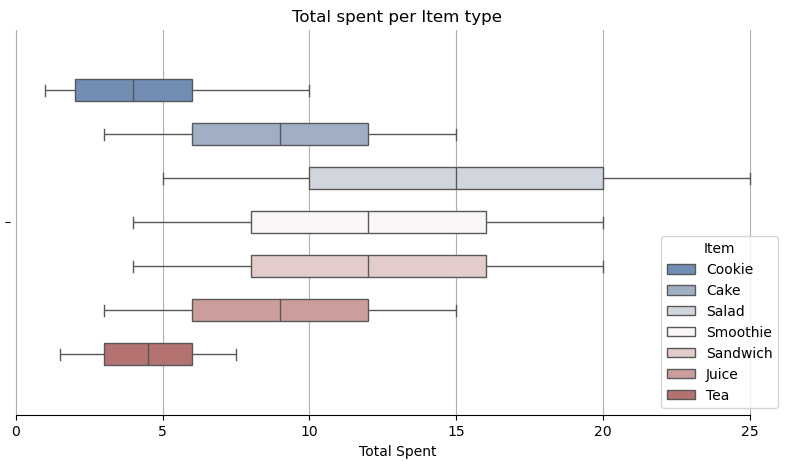

In [63]:
## Boxplot printing

f, ax = plt.subplots(figsize=(10, 5))
# ax.set_xscale("log")

sns.boxplot(df_cafe, x="Total Spent", hue="Item", gap=.5, width=.8, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(title="Total spent per Item type")
sns.despine(trim=True, left=True)

***

#### 02.b _ Scatterplot printing.

In [64]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


In [65]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum().reset_index()
rev_per_item

,Item,Total Spent
0,Cake,10407.0
1,Cookie,10316.0
2,Juice,10524.0
3,Salad,17355.0
4,Sandwich,13732.0
5,Smoothie,13352.0
6,Tea,4962.0


***

#### 02.b _ Barplot printing: ___2023 Items total revenue___.

In [67]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum()
rev_per_item

Item
Cake        10407.0
Cookie      10316.0
Juice       10524.0
Salad       17355.0
Sandwich    13732.0
Smoothie    13352.0
Tea          4962.0
Name: Total Spent, dtype: float64

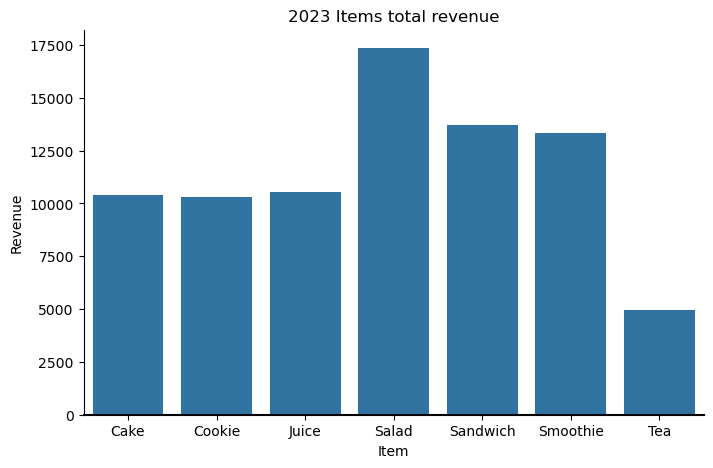

In [78]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5), sharex=True)

sns.barplot(data=rev_per_item, ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Revenue")
ax.set_title("2023 Items total revenue")

sns.despine(bottom=True)

***